In [1]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%run utility_functions.ipynb

In [28]:
from qiskit_ionq import IonQProvider
provider = IonQProvider('MSZ3nHSUkWvLg4YucxMDpNDESpGqQx3i')
print(provider.backends()) 

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [37]:
def cloningcircuit(alice_bit = 0, alice_base = 0, theta1=np.pi/8):    
    
    qr = QuantumRegister(3,'q')
    cr = ClassicalRegister(3,'c')

    qc = QuantumCircuit(qr,cr)
    
    if alice_bit == 0:
        if alice_base == 0:
            pass
        else:
            qc.h(qr[0])
    elif alice_bit == 1:
        if alice_base == 0:
            qc.x(qr[0])
        else:
            qc.x(qr[0])
            qc.h(qr[0])

                
    qc.barrier()

    # theta1=theta3=np.pi/4
    # theta2 = -math.asin(0.5 - math.sqrt(2)/3) ** 0.5
#     theta2 = 0.5 * (np.arccos((np.cos(2*theta1))/(np.sin(2*theta1))))
    
    if theta1 <= np.pi/4:
        theta2 = 0.5 * np.arccos(np.cos(2*theta1)/np.sin(2*theta1))
    if theta1 > np.pi/4:
        theta2 = 0.5 * np.arccos(-np.cos(2*theta1)/np.sin(2*theta1))
        
    theta3 = np.arctan(np.tan(theta1) * np.tan(theta2))
    
    print(theta1,theta2,theta3)
    
    #qc.sdg(y basis)
    
#     qc.u(2*theta1,0,0,qr[1])
    qc.ry(2*theta1,qr[1])
    qc.cx(qr[1],qr[2])
#     qc.u(2*theta2,0,0,qr[2])
    qc.ry(2*theta2,qr[2])
    qc.cx(qr[2],qr[1])
#     qc.u(2*theta3,0,0,qr[1])
    qc.ry(2*theta3,qr[1])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[2],qr[0])

    qc.barrier()
    
    if alice_base == 0:
        pass
    else:
        qc.h(qr[0])
        qc.h(qr[1])

    
    sim = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend=sim)
    result = job.result()
    sv = result.get_statevector()
    
    qc.measure([0,1],[0,1])
    
#     display(qc.draw(output='mpl'))
    return qc,sv

def displayresult(qc,sv,alice_bit=0,show=True,useIonQ=False):
    if not useIonQ:
        # define the backend
        backend= Aer.get_backend('qasm_simulator')
        # run the simulation
        job = execute(qc, backend=backend, shots = 2048)
        #get the result
        counts = job.result().get_counts()

    else:
        
        ionq = provider.get_backend("ionq_simulator")
        job = ionq.run(qc, backend=ionq, shots = 2048)
        counts = job.result().get_counts()
    
    if show:
        print ("Counts:",counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/2048
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/2048
    
    if show:
        print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
        # plot the histogram of the results
        display(plot_histogram(counts))
        display(plot_bloch_multivector(sv))
        display(array_to_latex(sv))
    
    return prob_bob, prob_alice

### QASM simulator

0.75 0.7499109550624189 0.7146902134750834


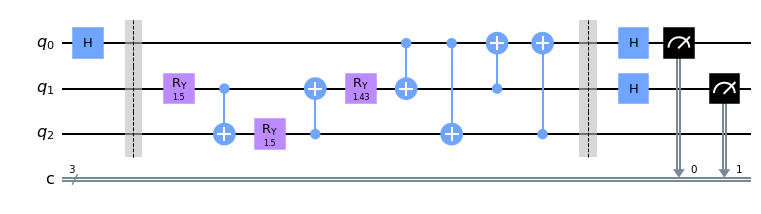

Counts: {'001': 1, '000': 1071, '010': 976}
The probability of Bob measuring the correct bit is  0.99951171875 and the probability of Alice eavesdropping the correct bit is 0.5234375


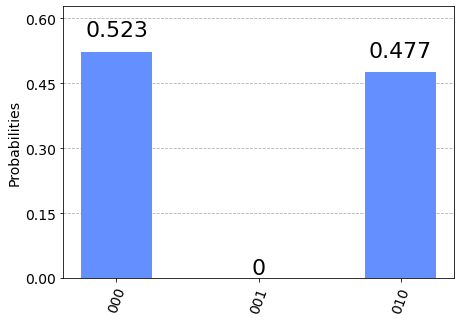

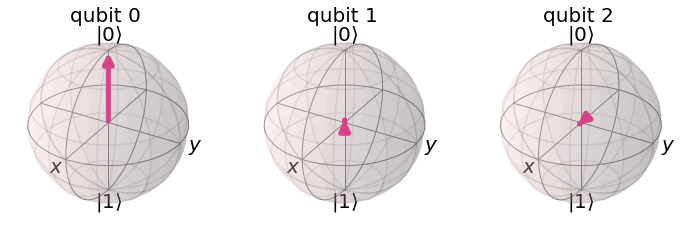

<IPython.core.display.Latex object>

(0.99951171875, 0.5234375)

In [38]:
qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=0.75)
display(qc.draw(output='mpl'))
displayresult(qc,sv,alice_bit=0,useIonQ=False) 

In [39]:
theta1s = np.linspace(1.1,2.9,19)
# print(theta1s_)
theta1s = np.pi/8 * theta1s

0.4319689898685966 0.2735077475943141 0.12861598644888833
0.471238898038469 0.37875983784057626 0.2000658653012283
0.5105088062083414 0.45559817472314695 0.2678092835021161
0.5497787143782138 0.5180815686914736 0.33605734678984245
0.5890486225480862 0.5718588702012102 0.40612838223576203
0.6283185307179586 0.6199347554199618 0.4784274379389724
0.6675884388878311 0.6641746723290882 0.5529144025039936
0.7068583470577035 0.7058710510446452 0.6292696520048421
0.7461282552275759 0.7460065734118613 0.7069789058567457
0.7853981633974483 0.7853981633974483 0.7853981633974482
0.8246680715673207 0.7460065734118614 0.7852761041485031
0.8639379797371932 0.7058710510446452 0.7843984042889406
0.9032078879070654 0.6641746723290883 0.7818845151086512
0.9424777960769379 0.6199347554199618 0.7765588841925861
0.9817477042468103 0.5718588702012103 0.7666590146702976
1.0210176124166825 0.518081568691474 0.7492430956053429
1.0602875205865552 0.4555981747231471 0.7187842656757769
1.0995574287564276 0.3787598

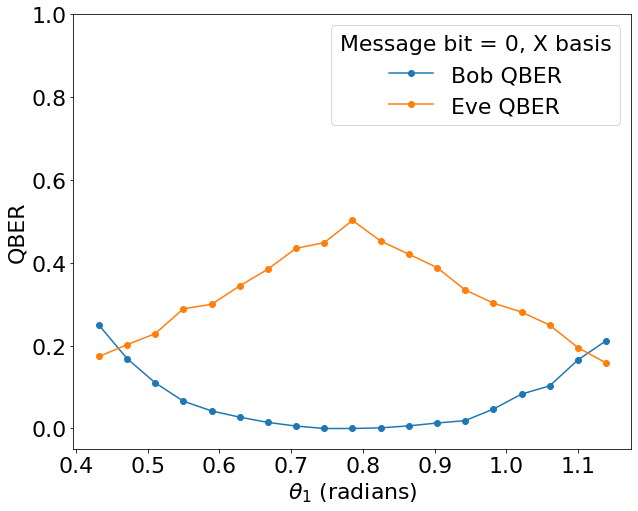

In [45]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=0,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

### IonQ simulator

0.75 0.7499109550624189 0.7146902134750834


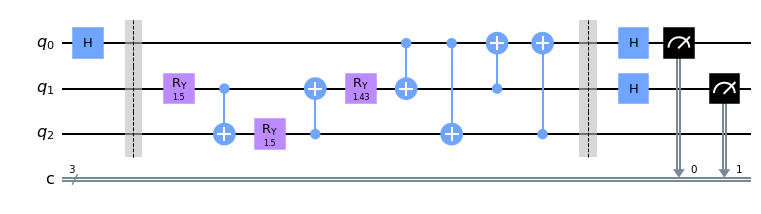

/opt/miniconda3/lib/python3.9/site-packages/qiskit_ionq/ionq_backend.py:314: UserWarning: Option backend is not used by this backend
  return super().run(circuit, **kwargs)


Counts: {'000': 1105, '001': 1, '010': 942, '011': 0}
The probability of Bob measuring the correct bit is  0.99951171875 and the probability of Alice eavesdropping the correct bit is 0.5400390625


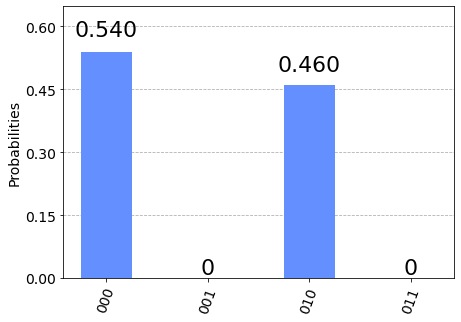

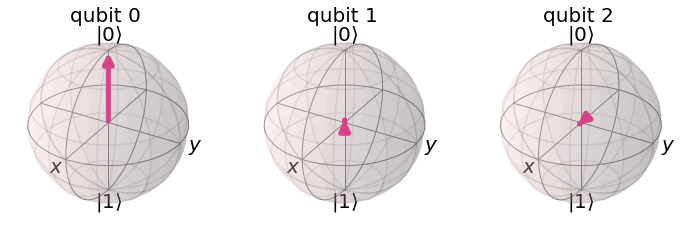

<IPython.core.display.Latex object>

(0.99951171875, 0.5400390625)

In [41]:
qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=0.75)
display(qc.draw(output='mpl'))
displayresult(qc,sv,alice_bit=0,useIonQ=True) 

0.4319689898685966 0.2735077475943141 0.12861598644888833


/opt/miniconda3/lib/python3.9/site-packages/qiskit_ionq/ionq_backend.py:314: UserWarning: Option backend is not used by this backend
  return super().run(circuit, **kwargs)


0.471238898038469 0.37875983784057626 0.2000658653012283
0.5105088062083414 0.45559817472314695 0.2678092835021161
0.5497787143782138 0.5180815686914736 0.33605734678984245
0.5890486225480862 0.5718588702012102 0.40612838223576203
0.6283185307179586 0.6199347554199618 0.4784274379389724
0.6675884388878311 0.6641746723290882 0.5529144025039936
0.7068583470577035 0.7058710510446452 0.6292696520048421
0.7461282552275759 0.7460065734118613 0.7069789058567457
0.7853981633974483 0.7853981633974483 0.7853981633974482
0.8246680715673207 0.7460065734118614 0.7852761041485031
0.8639379797371932 0.7058710510446452 0.7843984042889406
0.9032078879070654 0.6641746723290883 0.7818845151086512
0.9424777960769379 0.6199347554199618 0.7765588841925861
0.9817477042468103 0.5718588702012103 0.7666590146702976
1.0210176124166825 0.518081568691474 0.7492430956053429
1.0602875205865552 0.4555981747231471 0.7187842656757769
1.0995574287564276 0.3787598378405763 0.6630916741273746
1.1388273369263 0.27350774759

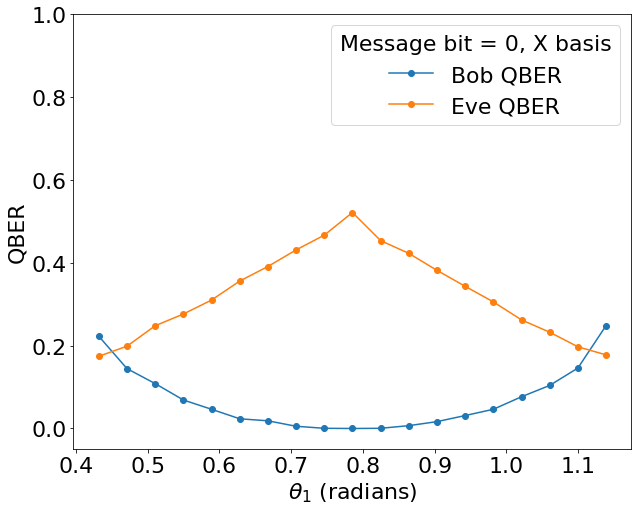

In [42]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=0,show=False,useIonQ=True)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

### IonQ QPU